In [5]:
from Networks import *

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [7]:
k_values = [0.5, 0.3, 0.2, 0.1, 0.05, 0.01]

In [11]:
sparseFunctions = [("Edge Betweenness", edge_betweenness_sparsification), ("Random", edge_random_sparsification), ("Edge Jaccard JC", edge_jaccard_sparsification), (r"$^*$Edge Local Search L-Spar", edge_L_Spar_sparsification), ("Clustering Coefficients", clustering_coeffs_edge_sampling), ("Metropolis-Hastings", metropolis_hastings_algorithm), ("Effective Resistance Sampling", effective_resistance_sampling_2)]
sparseFunctionNames = ["Edge Betweenness", "Random", "Edge Jaccard JC", "Edge Local Search L-Spar", "Clustering Coefficients", "Metropolis-Hastings", "Effective Resistance Sampling"]

In [12]:
sparseFunctionNames

['Edge Betweenness',
 'Random',
 'Edge Jaccard JC',
 'Edge Local Search L-Spar',
 'Clustering Coefficients',
 'Metropolis-Hastings',
 'Effective Resistance Sampling']

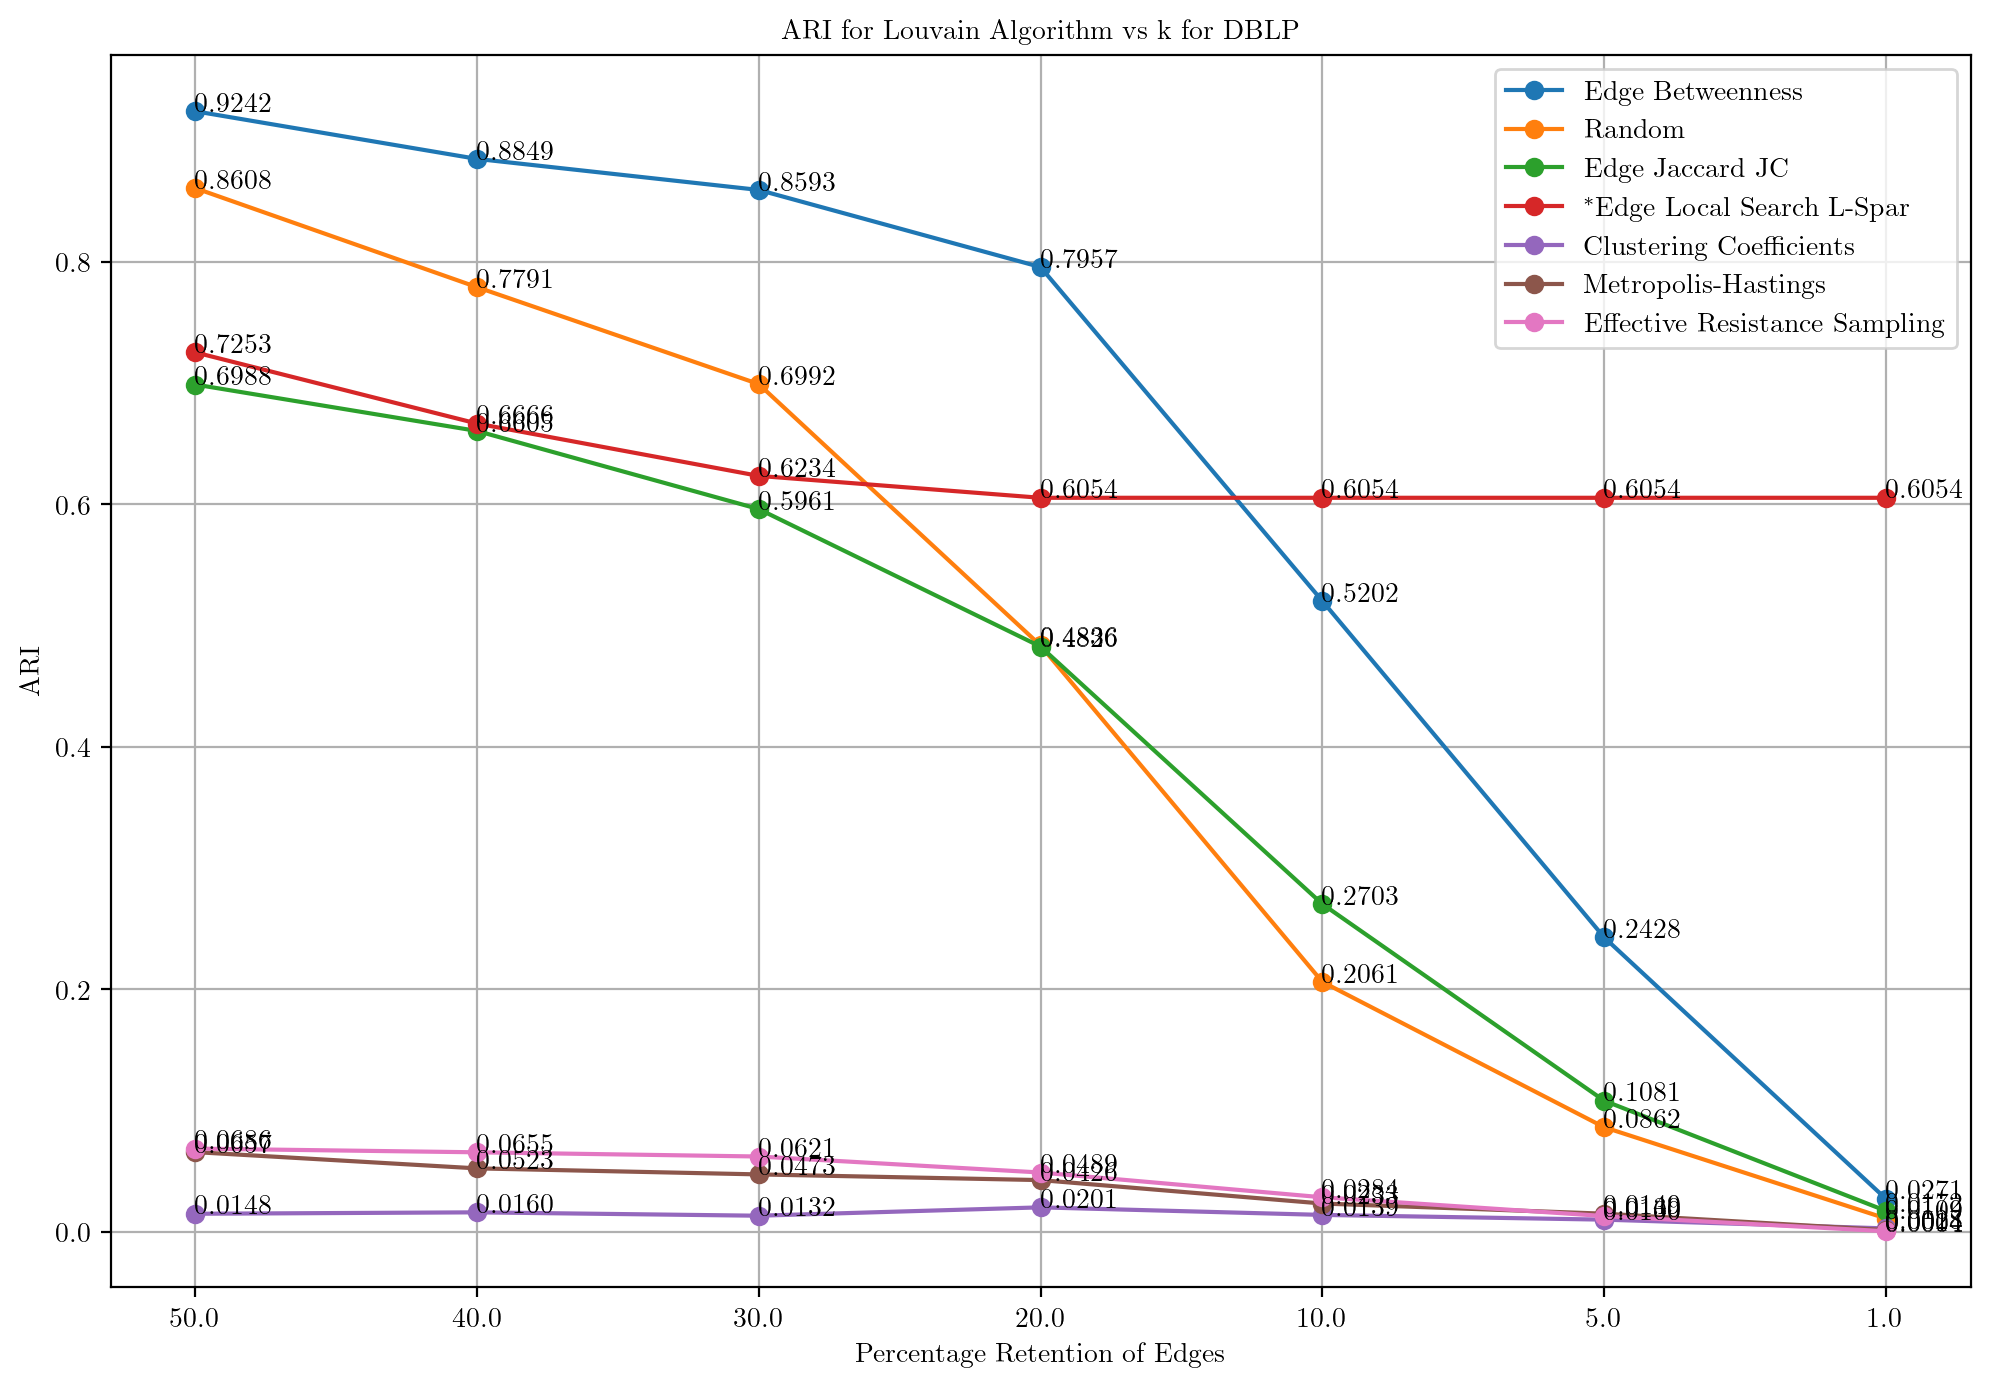

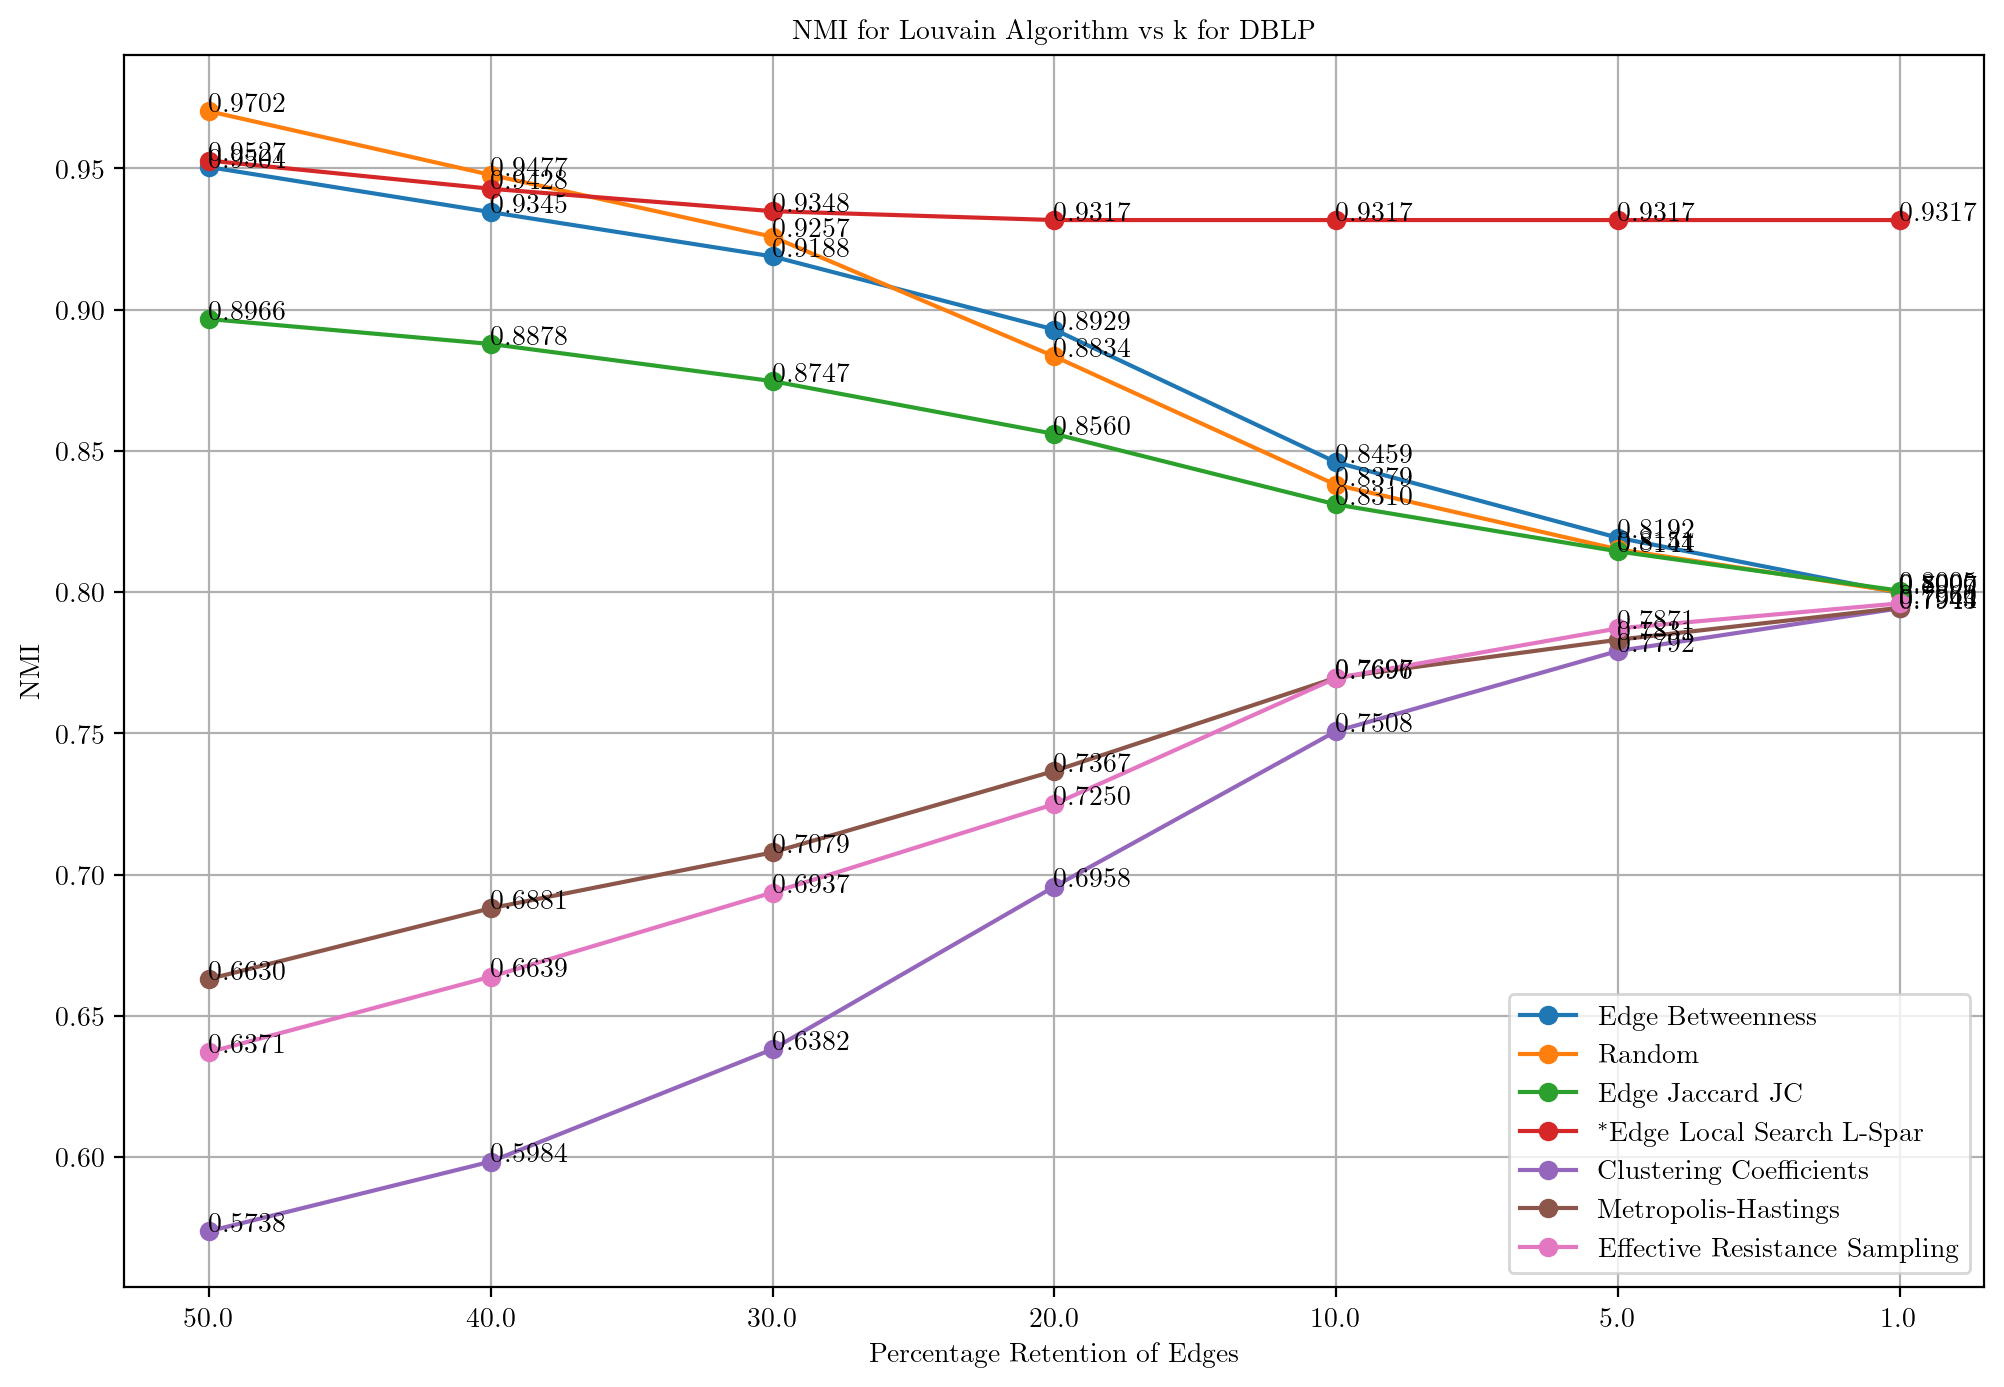

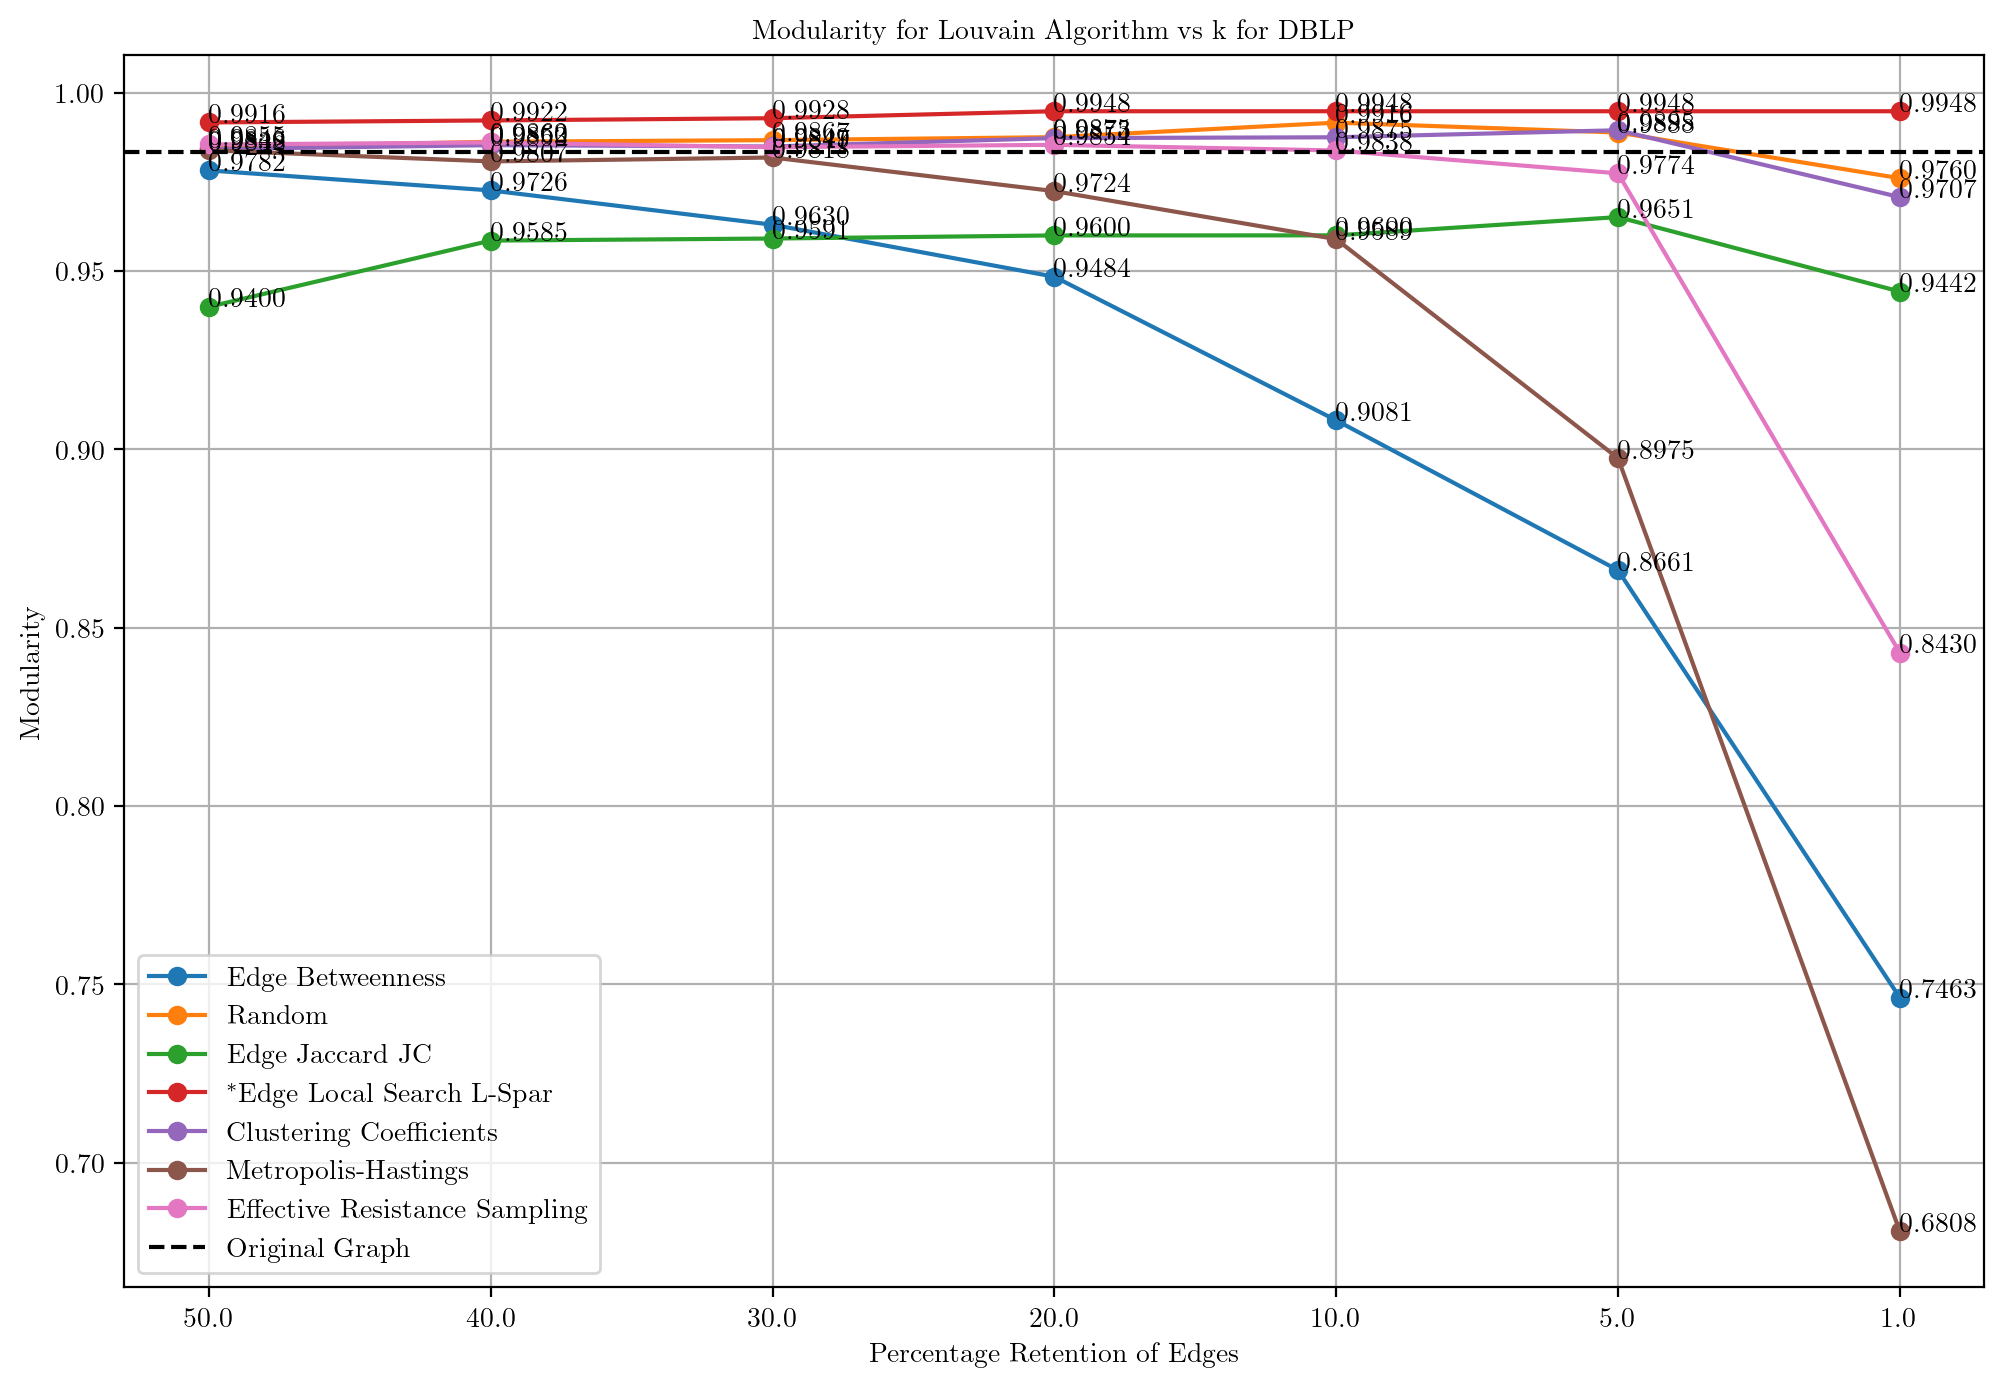

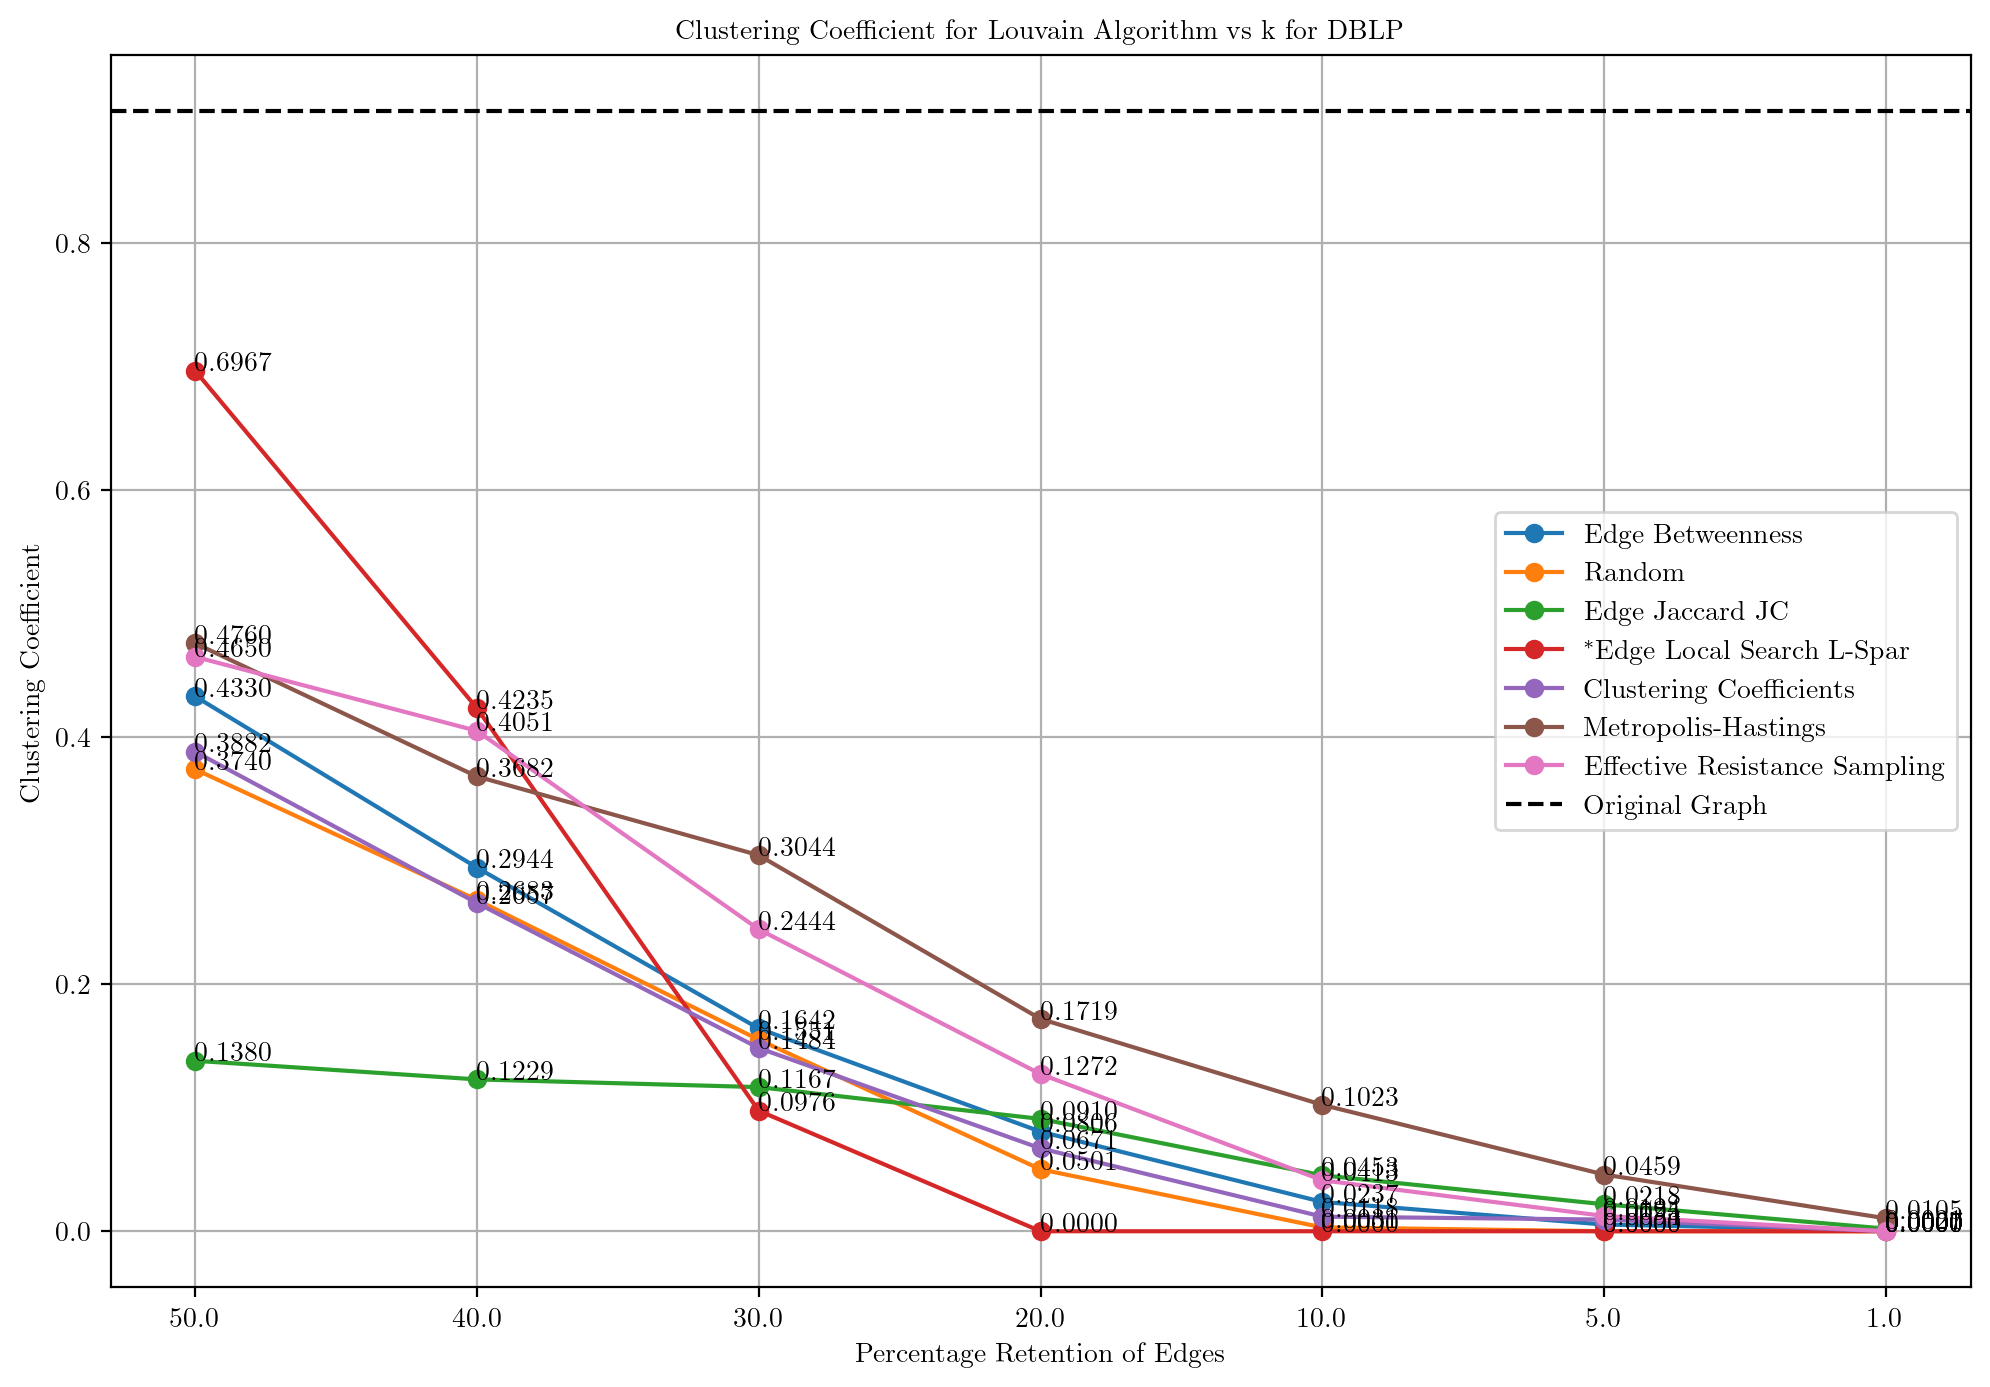

In [5]:
sparseDBLPGraphsLouvain = plot_metrics_sparse(G_ind_DBLP, run_louvain(G_ind_DBLP), sparseFunctions, k_values, run_louvain, 0, "DBLP", "Louvain Algorithm")

In [ ]:
sparseDBLPGraphsLPA = plot_metrics_sparse(G_ind_DBLP, get_community_dict(run_lpa(G_ind_DBLP)), sparseFunctions, k_values, run_lpa, 1, "DBLP", "Label Propogation Algorithm")

In [13]:
sparseDBLPGraphsLPA, ari, nmi, mod, clust = plot_metrics_sparse(G_ind_DBLP, get_community_dict(run_lpa(G_ind_DBLP)), sparseFunctions, k_values, run_lpa, 1, "DBLP", "Label Propogation Algorithm")
createDataFrames(ari, nmi, mod, clust, k_values, sparseFunctionNames, "LPA", "DBLP")

KeyboardInterrupt: 

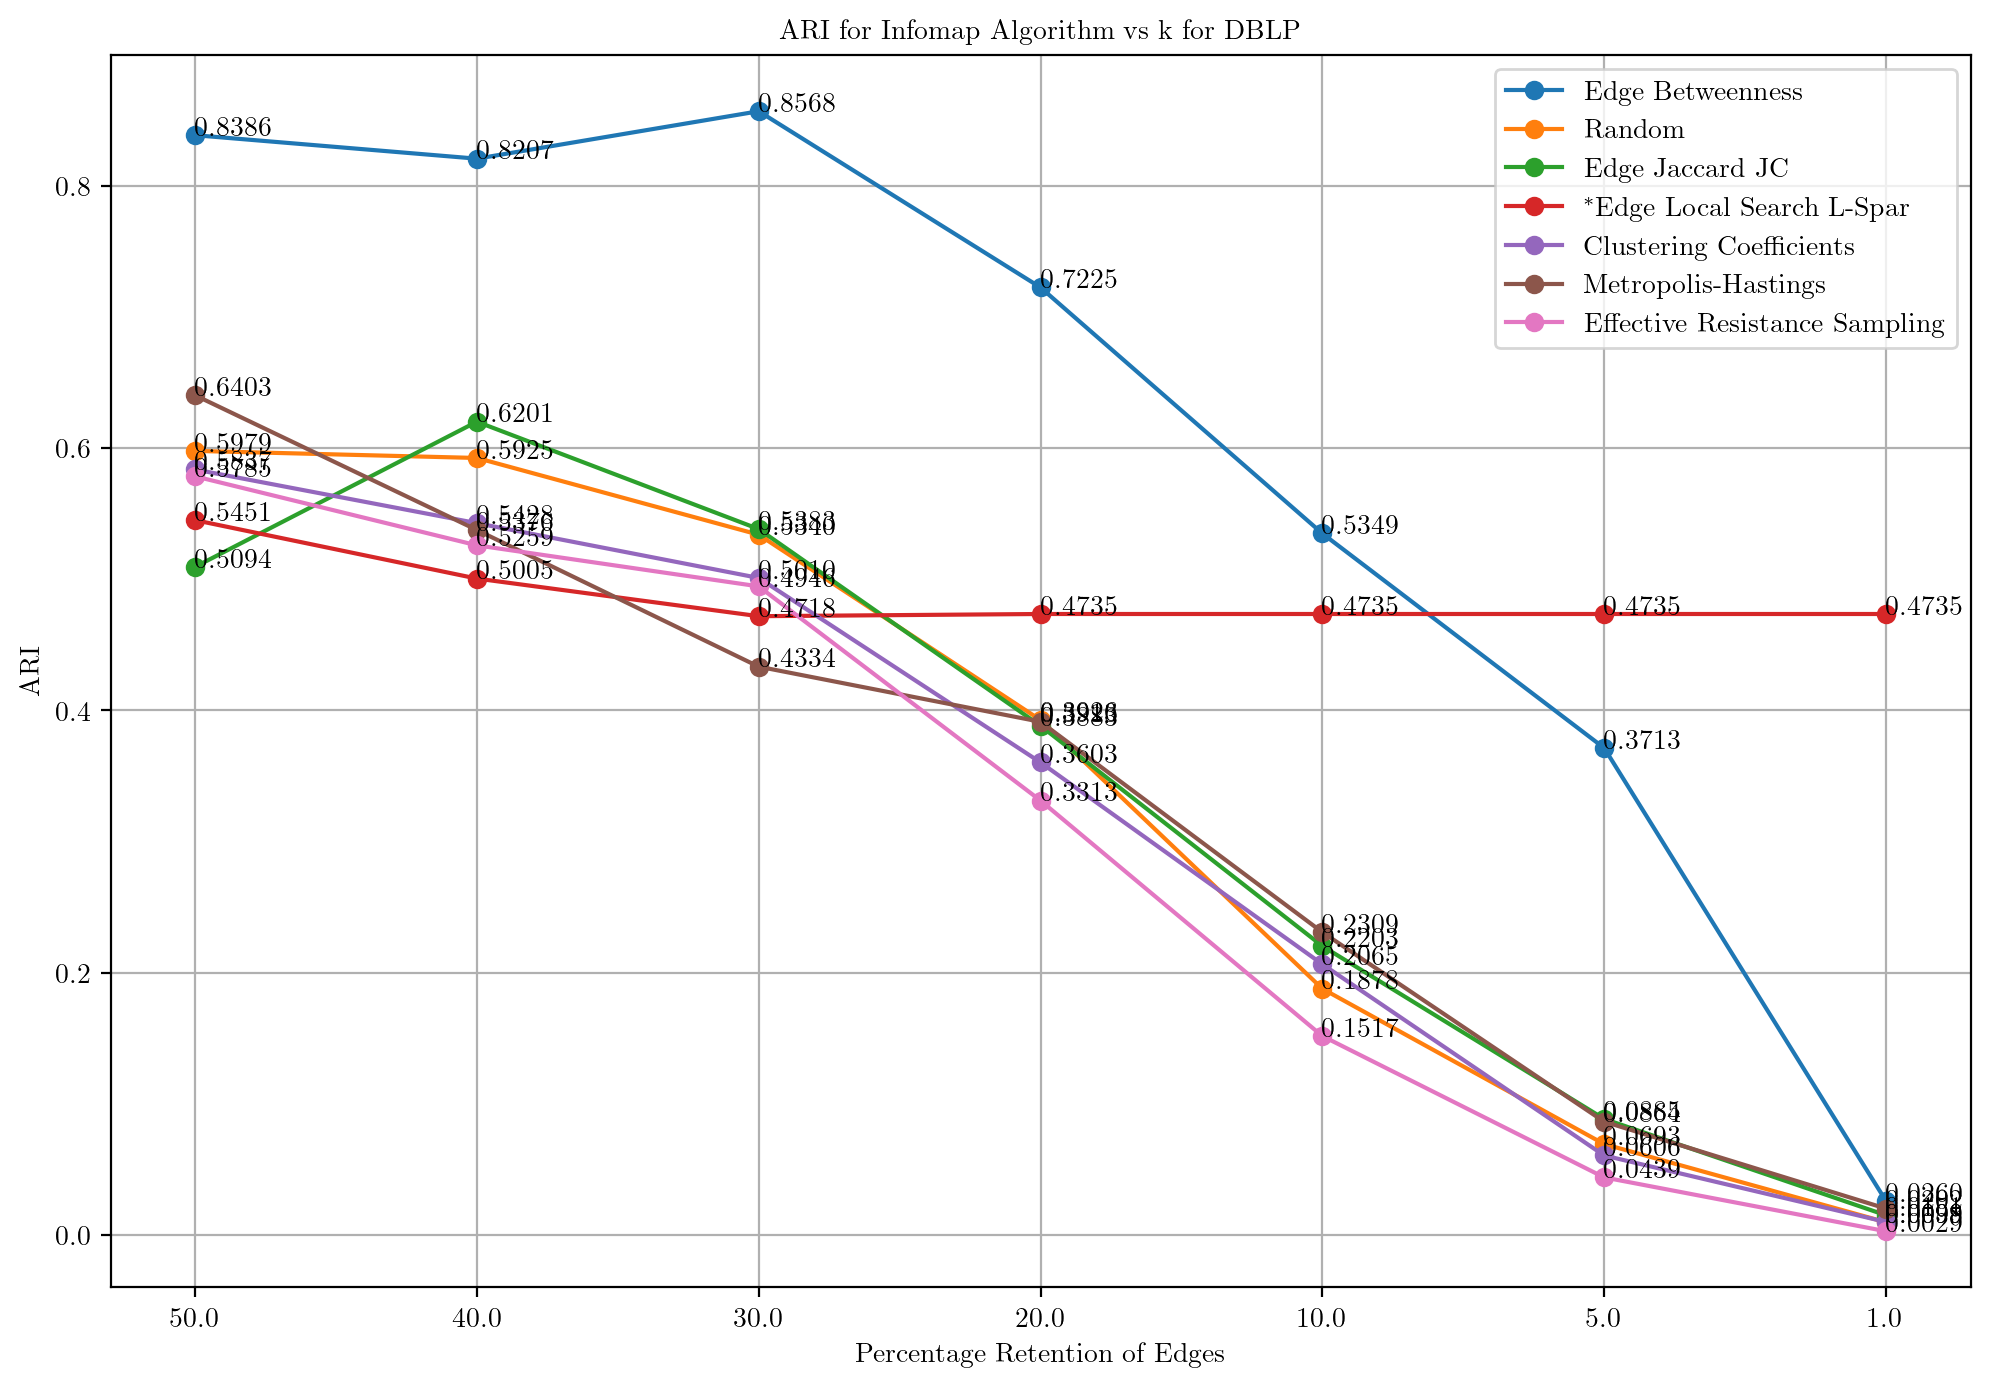

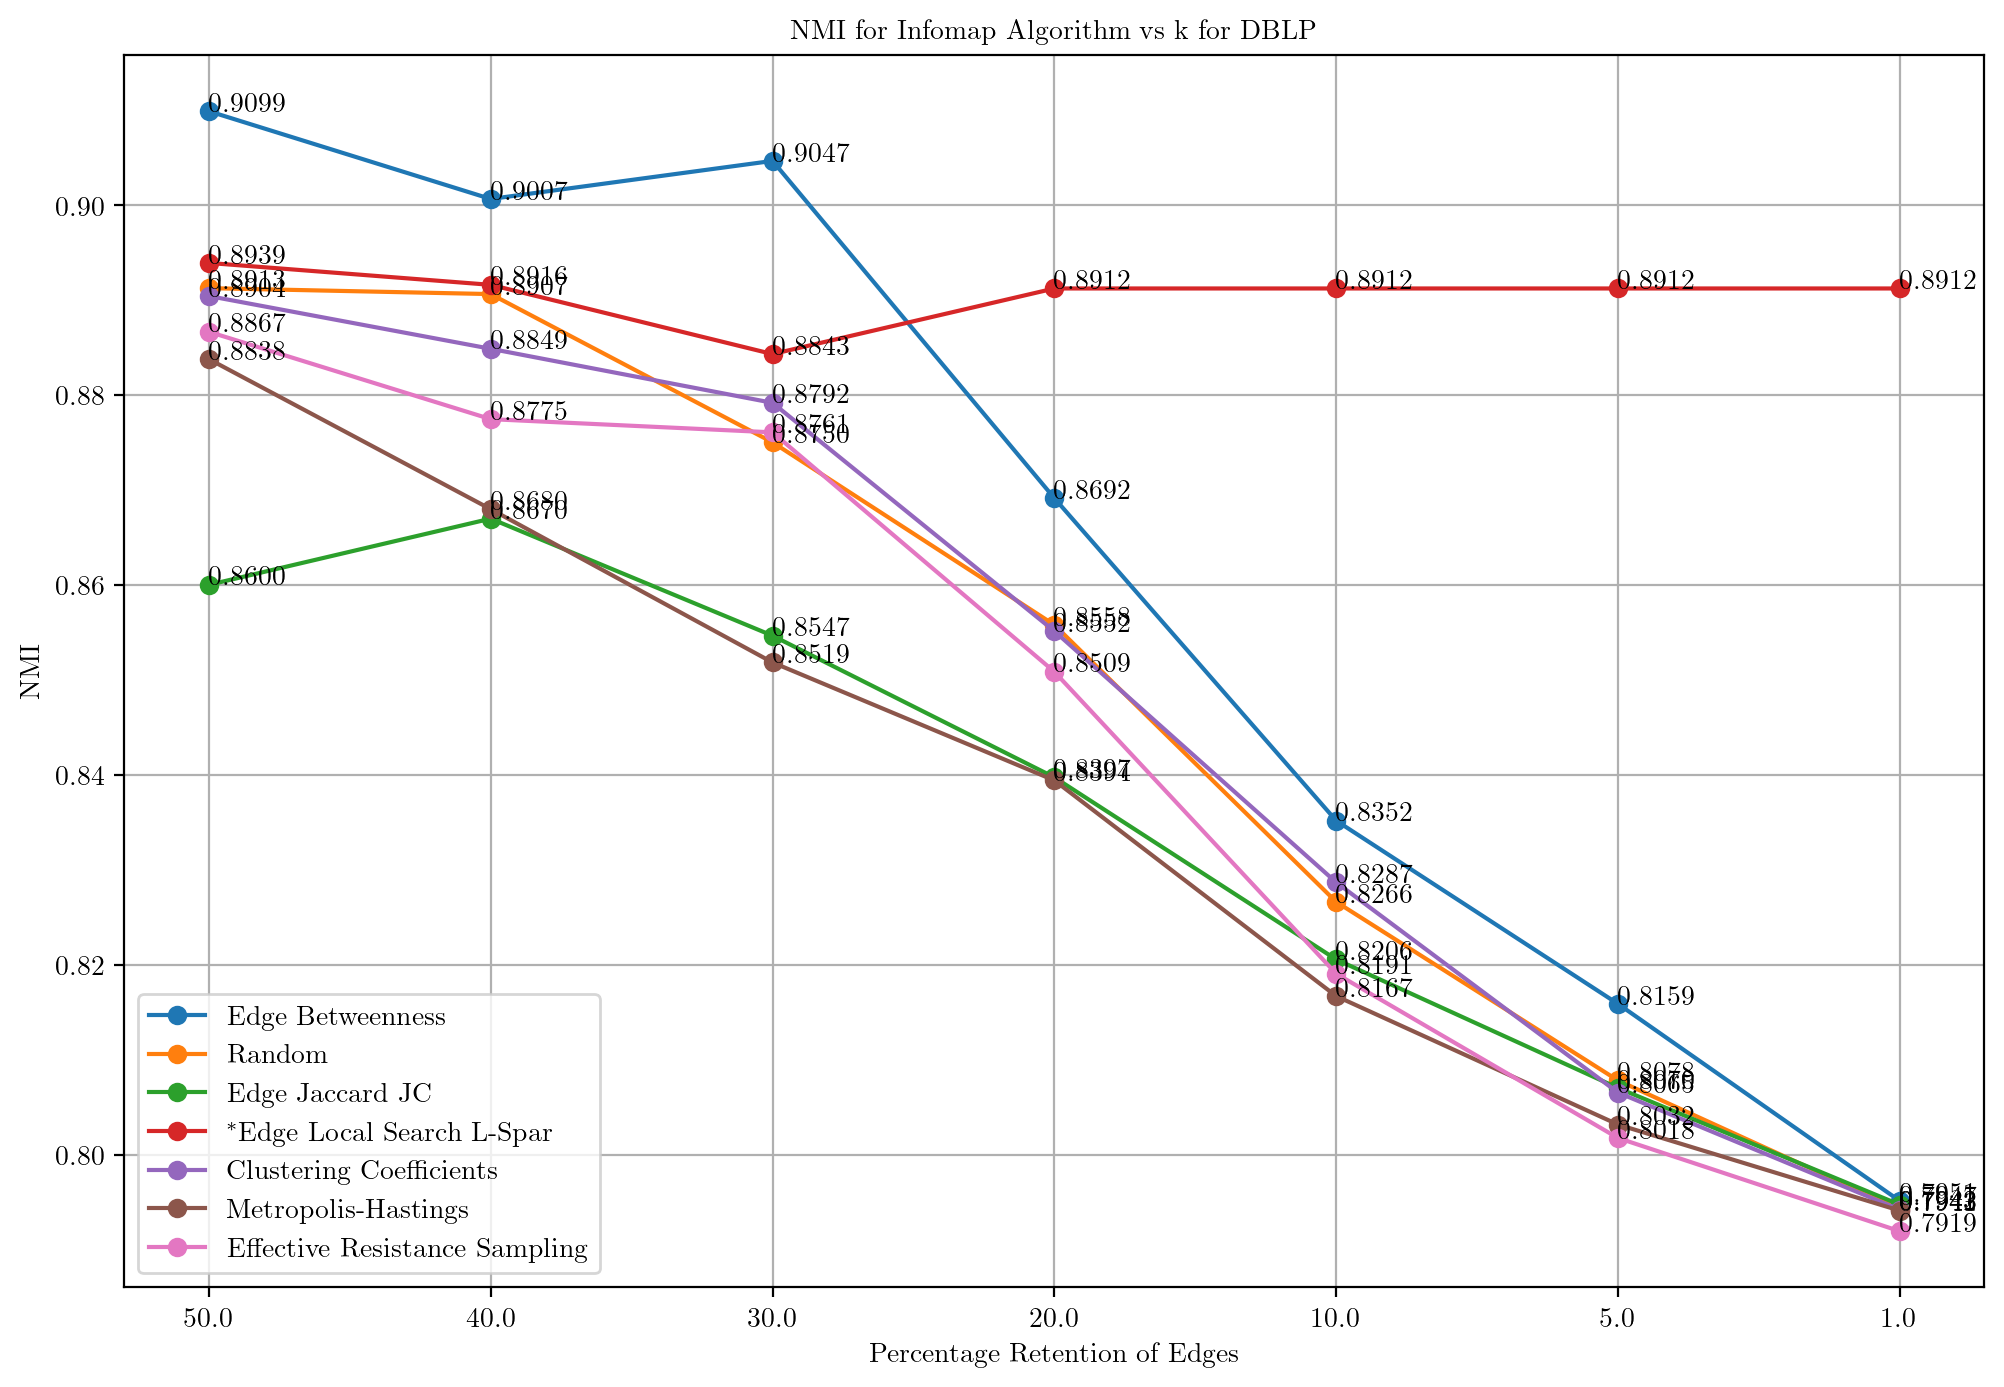

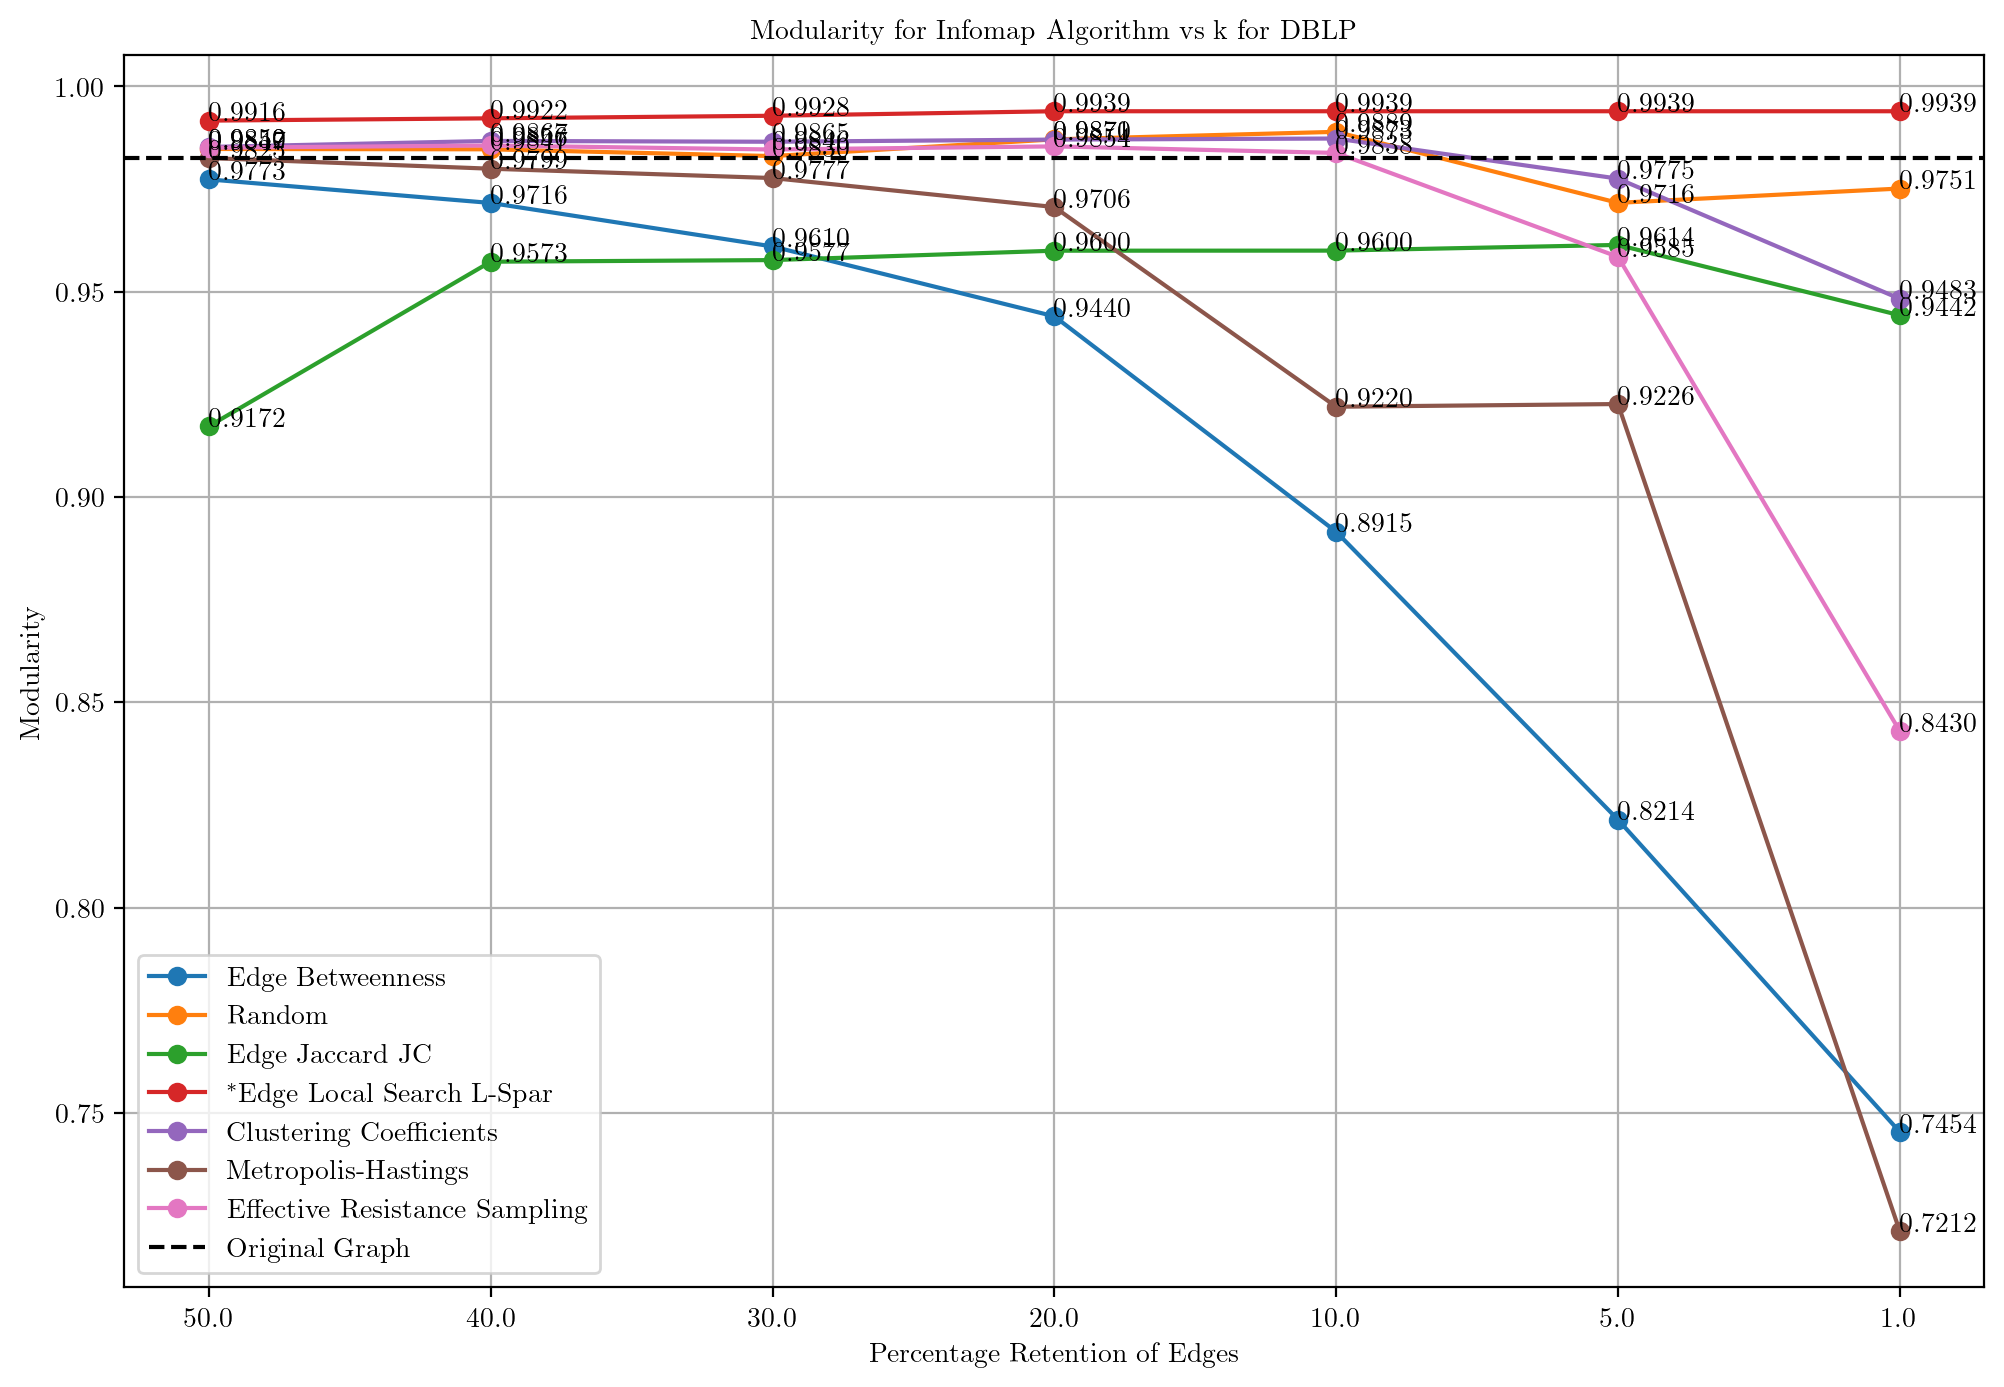

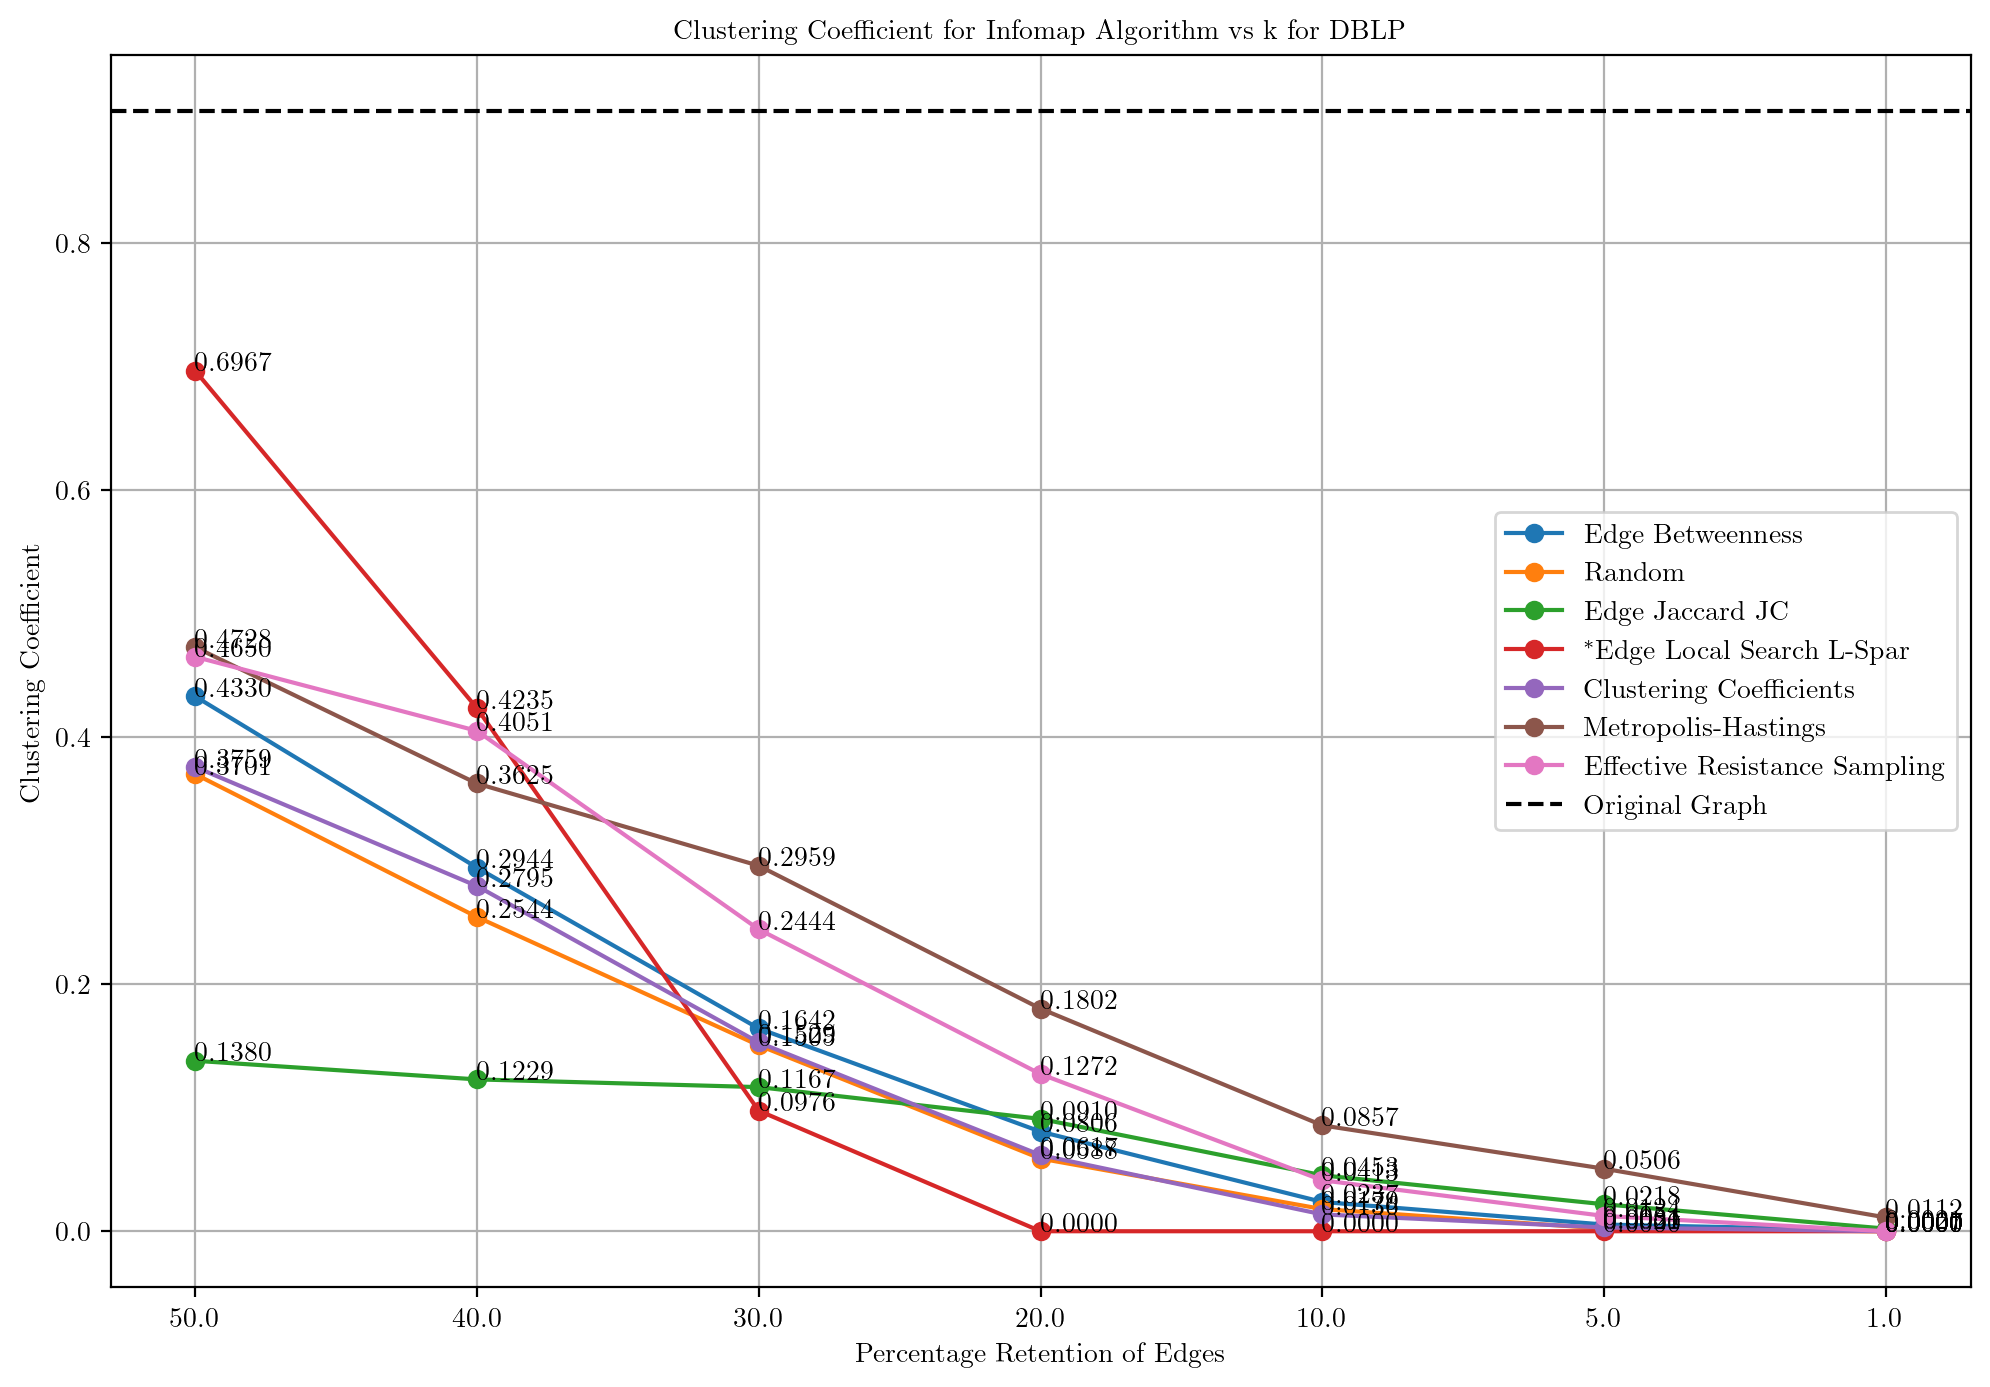

In [7]:
sparseDBLPGraphsInfomap = plot_metrics_sparse(G_ind_DBLP, get_community_dict(run_infomap(G_ind_DBLP).communities), sparseFunctions, k_values, run_infomap, 2, "DBLP", "Infomap Algorithm")

In [ ]:
# pandas dataframe of an example 2d list

lit = [[0.5, 0.3, 0.2, 0.1, 0.05, 0.01], [0.5, 0.3, 0.2, 0.1, 0.05, 0.01], [0.5, 0.3, 0.2, 0.1, 0.05, 0.01], [0.5, 0.3, 0.2, 0.1, 0.05, 0.01], [0.5, 0.3, 0.2, 0.1, 0.05, 0.01], [0.5, 0.3, 0.2, 0.1, 0.05, 0.01]]
df = pd.DataFrame(lit, columns = ['0.5', '0.3', '0.2', '0.1', '0.05', '0.01'], index = ['Edge Betweenness', 'Random', 'Edge Jaccard JC', 'Edge Local Search L-Spar', 'Clustering Coefficients', 'Effective Resistance Sampling'])
df

In [ ]:
# convert df to csv

df.to_csv('sparseDBLPGraphs.csv')

In [ ]:
def createDataFrames(ari_values, nmi_values, modularity_values, clust_coeff_values, k_values, sparseFunctionNames, algorithm, dataset):
    ari_df = pd.DataFrame(ari_values, columns = k_values, index = sparseFunctionNames)
    nmi_df = pd.DataFrame(nmi_values, columns = k_values, index = sparseFunctionNames)
    modularity_df = pd.DataFrame(modularity_values, columns = k_values, index = sparseFunctionNames)
    clust_coeff_df = pd.DataFrame(clust_coeff_values, columns = k_values, index = sparseFunctionNames)
    
    ari_df.to_csv(f"{algorithm}_{dataset}_ARI.csv")
    nmi_df.to_csv(f"{algorithm}_{dataset}_NMI.csv")
    modularity_df.to_csv(f"{algorithm}_{dataset}_Modularity.csv")
    clust_coeff_df.to_csv(f"{algorithm}_{dataset}_Clustering_Coefficients.csv")